5/5 [==============================] - 0s 8ms/step
Время обучения: 33.00 сек
Время предсказания: 0.3961 сек
MSE: 7.4457
MAE: 1.8264


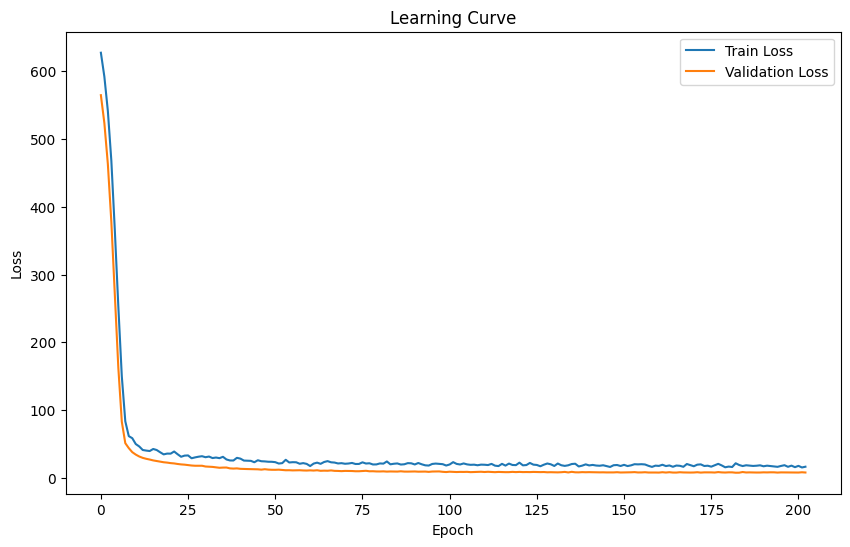

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1. Загрузка данных
file_path = "ENB2012_data.xlsx"
df = pd.read_excel(file_path)

# 2. Переименование столбцов
df.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
    'Heating_Load', 'Cooling_Load'
]

# 3. Подготовка данных
X = df.iloc[:, :8].values
y = df[['Heating_Load', 'Cooling_Load']].values

# 4. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Создание модели
def build_model():
    input_layer = Input(shape=(8,))
    
    # Скрытые слои
    x = Dense(64, activation='relu')(input_layer)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    # Выходной слой (2 выхода)
    output = Dense(2, activation='linear')(x)
    
    model = Model(inputs=input_layer, outputs=output)
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    return model

model = build_model()

# 7. Обучение модели
start_time = time.time()

history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=20)],
    verbose=0
)

train_time = time.time() - start_time

# 8. Предсказание и оценка
start_pred = time.time()
y_pred = model.predict(X_test)
pred_time = time.time() - start_pred

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 9. Вывод результатов
print(f"Время обучения: {train_time:.2f} сек")
print(f"Время предсказания: {pred_time:.4f} сек")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Дополнительно: График обучения
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()